<a href="https://colab.research.google.com/github/ShriwasShashwat/html-portfolio/blob/main/8_point_algorithm_optimizationCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To perform feature matching using the optimized 8-point algorithm in a noisy environment, we need to follow these steps:

Load Images: Load the two images you want to match features from.

Preprocessing: Convert the images to grayscale and apply any necessary noise reduction techniques (e.g., Gaussian blur).

Feature Detection: Use a feature detector (like SIFT, ORB, or SURF) to identify keypoints and descriptors in both images.

Feature Matching: Match the features between the two images using a descriptor matcher (like FLANN :fast nearest neighbor search in large datasets and for high dimensional features
or BFMatcher).

Fundamental Matrix Estimation: Use the 8-point algorithm to estimate the fundamental matrix from the matched points.

Inlier Detection: Identify inliers using RANSAC based on the estimated fundamental matrix.

Results Visualization: Display the original images side by side with the matches, showing the number of inliers before and after RANSAC.

Fundamental Matrix:
 [[-9.43968844e-06  1.51835871e-05 -7.71486194e-04]
 [-3.83812185e-05  7.72787665e-05 -9.84666820e-03]
 [ 4.90335960e-03 -9.27514189e-03  1.00000000e+00]]


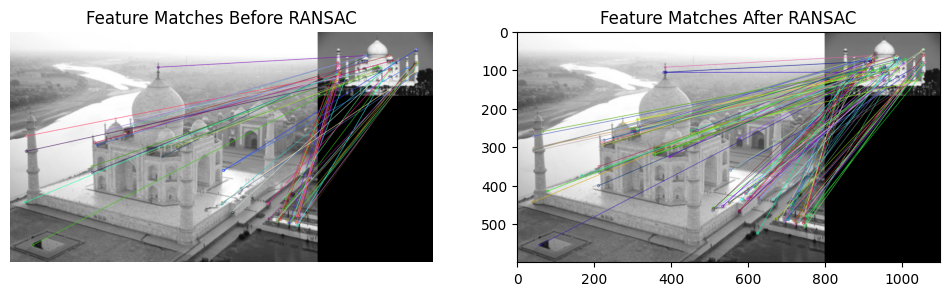

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images and convert to grayscale
img1 = cv2.imread('/content/tm1.jpg',cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/tm2.jpeg',cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
img1 = cv2.GaussianBlur(img1, (5, 5), 0)
img2 = cv2.GaussianBlur(img2, (5, 5), 0)

# Feature detection using ORB
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(img1, None)
keypoints2, descriptors2 = orb.detectAndCompute(img2, None)

# Feature matching using BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)
 # The lambda function takes each object x and returns its distance value for comparison.

# Extract matched points
pts1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Estimate fundamental matrix using the 8-point algorithm
F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_8POINT)

# Select inliers
inliers1 = pts1[mask.ravel() == 1]
inliers2 = pts2[mask.ravel() == 1]

# Draw matches before and after RANSAC
img_matches_before = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_matches_after = cv2.drawMatches(img1, keypoints1, img2, keypoints2, [matches[i] for i in range(len(matches)) if mask[i]], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Count inliers before and after
num_inliers_before = len(matches)
num_inliers_after = len(inliers1)

print("Fundamental Matrix:\n", F)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_matches_before)
plt.title(f'Feature Matches Before RANSAC')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_matches_after)
plt.title(f'Feature Matches After RANSAC')
plt.axis('on')

plt.show()




Explanation of Code Steps:

Load Images: The two images are loaded into memory.

Preprocessing: Images are converted to grayscale and blurred to reduce noise.

Feature Detection: ORB is used to detect keypoints and compute descriptors.

Feature Matching: BFMatcher is used to find matches between the descriptors of the two images.

Fundamental Matrix Estimation: The 8-point algorithm is employed to estimate the fundamental matrix.

Inlier Detection: RANSAC identifies inliers based on the estimated fundamental matrix.

Results Visualization: The matches are drawn before and after RANSAC, and the results are displayed.